In [10]:
# import cv2
# import numpy as np

# def find_eyes(img_grayscale,
#     ysize = 20,
#     xsize = 15,
#     x_bound = 30,
#     y_bound = 8,
#     nose_size_x = 24,
#     nose_size_y = 18,
#     eye_size_x = 24,
#     eye_size_y = 12):

#     #CONSTRUCT THE TWO HAAR-LIKE FEATURES
#     haar1 = np.concatenate( (np.zeros([ysize, xsize]), np.ones([ysize, xsize])),axis=0) - 0.5
#     haar2 = haar1*-1

#     #FILTER IMAGES AND THRESHOLD
#     har_fil1 = cv2.filter2D(src=img_grayscale, ddepth=-1, kernel=haar1)
#     thresh1 = (har_fil1 < np.min(har_fil1)*0.5)*1.0

#     har_fil2 = cv2.filter2D(src=img_grayscale, ddepth=-1, kernel=haar2)
#     thresh2 = (har_fil2 < np.min(har_fil2)*0.5)*1.0

#     binary_img1 = (thresh1*100).astype("uint8")
#     binary_img2 = (thresh2*100).astype("uint8")


#     potential_eyes = []
#     potential_cheeks = []

#     #USE THE OPENCV BLOB DETECTOR TO FIND THE EYES AND CHEEKS
#     params = cv2.SimpleBlobDetector_Params()

#     params.minThreshold = 10;    
#     params.maxThreshold = 200;

#     params.filterByColor = True
#     params.blobColor = 255

#     params.minCircularity = 0.1

#     params.filterByArea = True
#     params.minArea = 50
#     params.maxArea = 100000

#     detector = cv2.SimpleBlobDetector_create(params)

#     # FIND EYES
#     keypoints = detector.detect(binary_img1)


#     #EXCLUDE BLOBS NOT IN TYPICAL EYE LOCATION
#     for kp in keypoints:
#         if kp.pt[1] > binary_img1.shape[0]*0.5: continue
#         if kp.pt[1] < binary_img1.shape[0]*0.25: continue


#         if kp.pt[0] > binary_img1.shape[1]*0.8: continue
#         if kp.pt[0] < binary_img1.shape[1]*0.2: continue

#         potential_eyes.append(kp.pt)

#     # FIND CHEEKS
#     keypoints = detector.detect(binary_img2)

#     # SAME AS ABOVE
#     for kp in keypoints:
#         if kp.pt[1] > binary_img2.shape[0]*0.7: continue
#         if kp.pt[1] < binary_img2.shape[0]*0.4: continue


#         if kp.pt[0] > binary_img2.shape[1]*0.8: continue
#         if kp.pt[0] < binary_img2.shape[1]*0.2: continue

#         potential_cheeks.append(kp.pt)


#     plot_eyes = np.array(potential_eyes)
#     plot_eyes[:,0] = plot_eyes[:,0]+ xsize/2
#     plot_eyes[:,1] = plot_eyes[:,1]+ ysize/2

#     plot_cheeks = np.array(potential_cheeks)
#     plot_cheeks[:,0] = plot_cheeks[:,0]+ xsize/2
#     plot_cheeks[:,1] = plot_cheeks[:,1]+ ysize/2

#     # CROP TO FIND MORE PRECISE COORDS
#     eye_crop = img_grayscale[int(np.mean(plot_eyes[:,1]))-y_bound: int(np.mean(plot_cheeks[:,1])),
#                               int(np.min(plot_eyes[:,0]))-x_bound : int(np.max(plot_eyes[:,0]))+x_bound]



#     #Detect center of eyes = nose
#     haar_nose = np.zeros([nose_size_y, nose_size_x])
#     haar_nose[:, int(nose_size_x*0.33):int(nose_size_x*0.67)] = 1
#     haar_nose = haar_nose - 0.5

#     haar_fil_nose = cv2.filter2D(src=eye_crop, ddepth=-1, kernel=haar_nose)
#     haar_fil_nose = haar_fil_nose - np.mean(haar_fil_nose)

#     #COORDS OF NOSE BRIDGE
#     idx = np.unravel_index(np.argmax(haar_fil_nose), haar_fil_nose.shape)

#     # HAAR-LIKE FEATURE FOR EYES
#     haar_eye = np.ones([eye_size_y, eye_size_x])
#     haar_eye[int(eye_size_y*0.1):int(eye_size_y*0.9), int(eye_size_x*0.33):int(eye_size_x*0.67)] = 0
#     haar_eye = haar_eye - 0.9

#     THRESHOLD_VAL = 0.8

#     haar_fil_eye = cv2.filter2D(src=eye_crop, ddepth=-1, kernel=haar_eye)
#     haar_fil_eye = haar_fil_eye - np.mean(haar_fil_eye)
#     thresh_eye = (haar_fil_eye > np.max(haar_fil_eye)*THRESHOLD_VAL)*1.0


#     params = cv2.SimpleBlobDetector_Params()

#     params.minThreshold = 2;   
#     params.maxThreshold = 200;

#     params.filterByColor = True
#     params.blobColor = 255

#     params.minCircularity = 0

#     params.filterByArea = True
#     params.minArea = 5
#     params.maxArea = 100

#     detector = cv2.SimpleBlobDetector_create(params)

#     binary_img = (thresh_eye*100).astype("uint8")
#     keypoints = detector.detect(binary_img)

#     #IF ZERO EYES FOUND, CHANGE THRESHOLD UNTIL THEY ARE FOUND

#     while len(keypoints) == 0:
#         THRESHOLD_VAL -= 0.02
#         thresh_eye = (haar_fil_eye > np.max(haar_fil_eye)*THRESHOLD_VAL)*1.0
#         binary_img = (thresh_eye*100).astype("uint8")
#         keypoints = detector.detect(binary_img)
#         if THRESHOLD_VAL == 0.7: THRESHOLD_VAL = 0.9
#         if THRESHOLD_VAL == 0.8: continue

#     exact_eyes = []
#     for kp in keypoints:
#         exact_eyes.append(kp.pt)

#     # GET COORDS OUT OF KEYPOINTS
#     coords_eyes = np.array(exact_eyes)

#     eye_coord1 = coords_eyes[0,0]
#     if len(coords_eyes) < 2:
#         eye_coord2 = idx[1] - (coords_eyes[0,0] - idx[1])
#     else:
#         eye_coord2 = coords_eyes[1,0] 


#     eye_coord1 += int(np.min(plot_eyes[:,0]))-x_bound 
#     eye_coord2 += int(np.min(plot_eyes[:,0]))-x_bound 

#     eye_y_coord = coords_eyes[0,1] + int(np.mean(plot_eyes[:,1]))-y_bound 
#     return [(eye_coord1, eye_y_coord), (eye_coord2, eye_y_coord)]

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from find_eyes import find_eyes

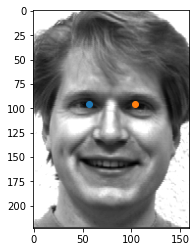

In [16]:
im_file = 'images/subject01_happy.png'
img_raw = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
img_grayscale = img_raw[20:, 100:260] 



# im_file = 'images/subject05_normal.png'
# img_raw = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# img_grayscale = img_raw[30:, 110:260]

# im_file = 'images/subject03_normal.png'
# img_raw = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# img_grayscale = img_raw[30:, 90:240]

eye_list = find_eyes(img_grayscale)

plt.scatter(x = eye_list[0][0], y = eye_list[0][1])
plt.scatter(x = eye_list[1][0], y = eye_list[1][1])

plt.imshow(img_grayscale, cmap='gray')
plt.show()